### Introducing logistic growth

Throughout this lesson, we will successively build towards a program that will calculate the logistic growth of a population of bacteria in a petri dish (or bears in the woods, if you prefer). Logistic growth produces a classic S shaped curve in which a population initially grows very fast, then slows down over time until it reaches a steady state value known as the carrying capacity.

For example, when there are only few bears in the woods and lots of food, they reproduce very fast. As the woods get full of bears and food gets harder to find, growth slows until the number of bears just balances with the amount of food (and hunters) in the woods, at which point the population stops growing.

A commonly used discrete time equation for logistic population growth is

$$ n_{t+1} = n_{t} + r n_{t} (1 - n_{t} / K) $$

where $n_t$ is the population size at time $t$, $r$ is the maximum net per capita growth rate, and $K$ is the carrying capacity of the dish/woods.

In [8]:
r = 0.3  # the maximum net per capita growth rate
K = 100 # carrying capacity of the environment
n0 = 10 # the population at time 0

We can calculate the population at $t = 1$ and $t = 2$

In [9]:
n1 = n0 + r*n0*(1 - n0/K) # calculate the population at time 1
n2 = n1 + r*n1*(1 - n1/K) # calculate the population at time 2

print(n0, n1, n2)

10 12.7 16.02613


Calculating the population for each generation by hand is obviously time consuming. We can have the computer automatically generate results for the population for 100 generations.

In [10]:
populationsize = []  #an empty list
n = 10 # the initial population size

for i in range(100):  # the range function provides a list to iterate through from 0 up to but not including 100
    populationsize.append(n) # add pop size to list
    n = round(n + r*n*(1 - n/K))  #calculate the next generation n (use the round function to do some rounding)
    
print(populationsize)

[10, 13, 16, 20, 25, 31, 37, 44, 51, 58, 65, 72, 78, 83, 87, 90, 93, 95, 96, 97, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]


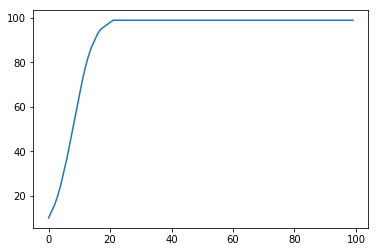

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(populationsize); #add semicolon to avoid the extra text

### Adding some randomness to the model
Let's introduce some element of randomness into our population growth model. We'll model a simple "catastrophe" process, in which a catastrophe happens in 10% of the time steps that reduces the population back down to the initial size. We create a TRUE/FALSE variable (a boolean) that will be True if a catastrophe has occurred, and False if it hasn't. A simple way to do this is to generate a pseudorandom number between 0 and 1 using `random` function in the `random` package. Check whether this number is less than 0.1 - this check will be True 10% of the time.
We add an if statement to the for loop that checks whether catastrophe is true in each time step. If it is true, set the population back to the initial size. Otherwise, perform the usual logistic growth calculation. We can plot our results. Run the cell again to see a different random population growth path.


In [24]:
from random import random
def plot_pop_catastrophe_rK(n0,r,K):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(100):
        populationsize.append(n)
        catastrophe = (random() < 0.1)  # Random catastrophe 10% of time - results in either TRUE or FALSE
        if catastrophe:  #check if it equals TRUE
            n = n0        
        else:
            n = round(n + r*n*(1 - n/K))

    plt.plot(populationsize)
    
    return populationsize

**You don't have to worry about how the function is defined, but now you can set r, K, and n0 and plot the population size over time**

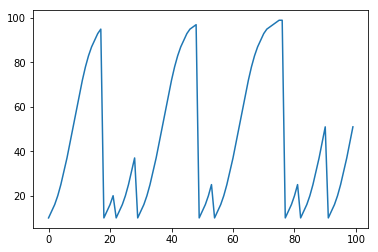

In [26]:
r = 0.3  # the maximum net per capita growth rate
K = 100 # carrying capacity of the environment
n0 = 10 # the population at time 0

popsize = plot_pop_catastrophe_rK(n0,r,K)

Consider that there is stochasticity in real data. That means that the actual population size probably won't be what you calculated. We can add this stochasticity to our population by multiplying our calculated population size by a value drawn from a normaldistribution.

In [19]:
from random import normalvariate

In [27]:
def plot_pop_stoch(n0,r,K,g):
    
    populationsize = []  #an empty list
    n = n0 # set the current population size

    for i in range(g):
        populationsize.append(n)   
        n = round(n + r*n*(1 - n/K))
        n = n*normalvariate(1, .1)

    plt.plot(populationsize)
    
    return populationsize

** Again don't worry about the function, just call it. We've also added a parameter to change the number of generations. **

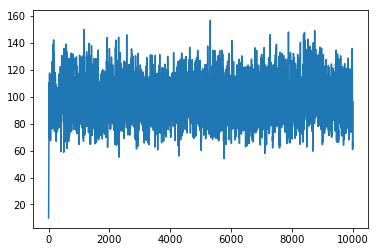

In [28]:
r = 0.3  # the maximum net per capita growth rate
K = 100 # carrying capacity of the environment
n0 = 10 # the population at time 0
g = 10000 # the number of generations to simulate
pop_size = plot_pop_stoch(n0,r,K,g)

** Try changing the parameters and rerunning the code **